#Bibliotecas e autenticação

In [1]:
!pip install -U -q PyDrive

In [2]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id': '1-EL5jV5m_7zJi-rKgDXMAcCSrTGkq7z2'})
downloaded.GetContentFile('not_client.csv')
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [ ]:
not_client = pd.read_csv('not_client.csv')
client = pd.read_csv('client.csv')

##Comparação de features em relação ao indice de novo cliente


In [95]:
matriz_corr = not_client.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

,Unnamed: 0,vlr_credito,num_atend_atrs,vlr_score,num_atend,qtd_reclm,qtd_restr,vlr_renda,ind_novo_cli
Unnamed: 0,1.000000,-0.004607,0.005030,-0.003689,0.001298,0.000004,-0.002301,-0.000855,-0.005114
vlr_credito,-0.004607,1.000000,-0.000654,0.094079,-0.001340,0.002196,0.114967,0.474466,0.028897
num_atend_atrs,0.005030,-0.000654,1.000000,0.007907,0.537946,-0.000046,-0.000860,0.000204,0.004194
vlr_score,-0.003689,0.094079,0.007907,1.000000,0.003653,-0.002278,-0.103882,0.145935,0.618704
num_atend,0.001298,-0.001340,0.537946,0.003653,1.000000,-0.000088,-0.000059,0.001665,-0.001255
qtd_reclm,0.000004,0.002196,-0.000046,-0.002278,-0.000088,1.000000,0.005118,-0.001529,-0.002539
qtd_restr,-0.002301,0.114967,-0.000860,-0.103882,-0.000059,0.005118,1.000000,0.089440,-0.316344
vlr_renda,-0.000855,0.474466,0.000204,0.145935,0.001665,-0.001529,0.089440,1.000000,0.065169
ind_novo_cli,-0.005114,0.028897,0.004194,0.618704,-0.001255,-0.002539,-0.316344,0.065169,1.000000


In [94]:
target_corr = matriz_corr.data.ind_novo_cli
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,ind_novo_cli
ind_novo_cli,1.000000
vlr_score,0.618704
qtd_restr,0.316344
vlr_renda,0.065169
vlr_credito,0.028897
Unnamed: 0,0.005114
num_atend_atrs,0.004194
qtd_reclm,0.002539
num_atend,0.001255


#Testagem de hiperparâmetros manualmente nos modelos Novo cliente











##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['vlr_credito', 'vlr_renda', 'qtd_restr','vlr_score']

# Dividindo x e y
x = not_client[cols]
y = not_client['ind_novo_cli']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 50)

In [ ]:
not_client[cols].head()

##Árvore de decisão Parâmetro 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

In [ ]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

###Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

###Matriz de confusão

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='gini', random_state=42)
avd.fit(x_train, y_train)

In [ ]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

###Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

###Matriz de confusão

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=42)
avd.fit(x_train, y_train)

In [ ]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

###Métricas

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

Recall

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

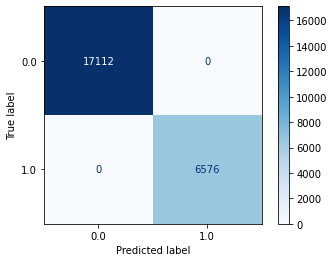

In [27]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 4

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy',max_features='log2', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [29]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [31]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [32]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

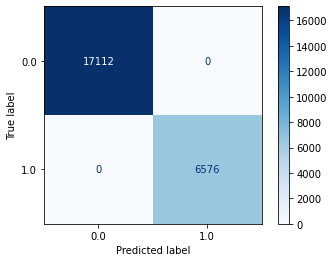

In [33]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 5

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy',max_features='sqrt', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [35]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

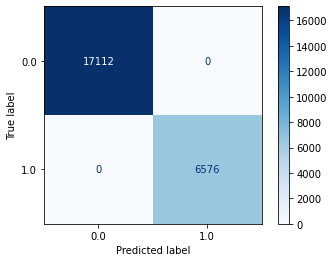

In [39]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


###De acordo com os parâmetros utilizados, todos os resultados analisados foram iguais, pois há um vazamento de dados a partir do vlr_score.
#### 

##Random Forest Parâmetro 1


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy',max_features='sqrt', random_state=42)
rdf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [41]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [43]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [44]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

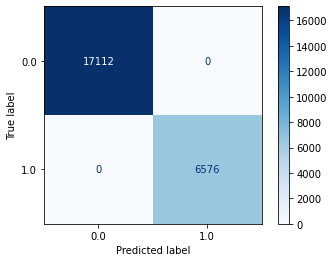

In [45]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 2


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='gini', random_state=42)
rdf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [49]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [50]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

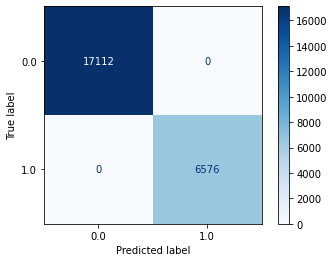

In [51]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 3


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=42)
rdf.fit(x_train, y_train)



RandomForestClassifier(criterion='entropy', random_state=42)

In [53]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [55]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [56]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

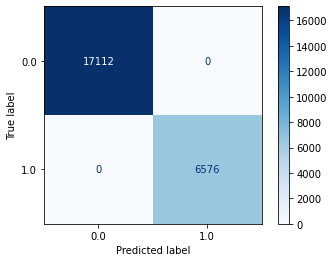

In [57]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 4


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy', max_features='sqrt', random_state=42)
rdf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [59]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [61]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

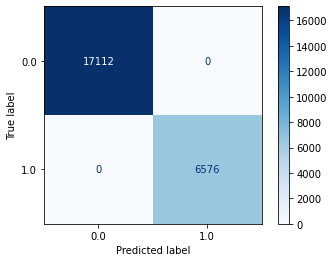

In [63]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 5


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy', max_features='log2', random_state=42)
rdf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [65]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [67]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [68]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

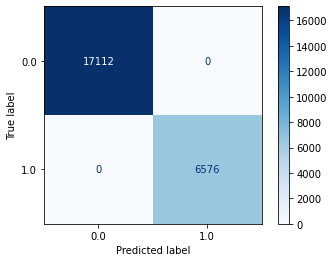

In [69]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

In [70]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [71]:
y_pred_rgl = rgl.predict(x_test)

###Métricas

Acuracia

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.8453647416413373

Precisão

In [73]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

0.769273433166944

Recall

In [74]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.6327554744525548

###Matriz de confusão

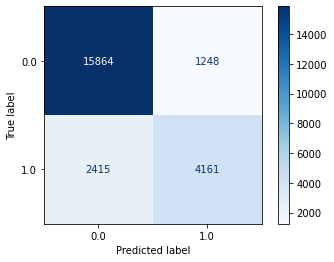

In [75]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')

#GridSearch

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

##Random Forest

In [77]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40, 60, 80, 100],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}

rdf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log loss'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 20, 40, 60, 80, 100]})

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
rdf_best = grid_search.best_estimator_
rdf_best

In [ ]:
y_pred = rdf_best.predict(x_test)
print('Acc treino: ', rdf_best.score(x_train, y_train ))
print('Acc teste: ', rdf_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

## ÁRVORE DE DECISÃO

In [ ]:
parametros = { 'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}


grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

In [ ]:
y_pred = dt_best.predict(x_test)
print('Acc treino: ', dt_best.score(x_train, y_train ))
print('Acc teste: ', dt_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

#RandomSearch

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40, 60, 80, 100],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}

random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)

In [ ]:
rdf_best = random_search.best_estimator_
rdf_best

In [ ]:
y_pred = rdf_best.predict(x_test)
print('Acc treino: ', rdf_best.score(x_train, y_train ))
print('Acc teste: ', rdf_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

##Árvore de decisão

In [ ]:
parametros = { 'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}


random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)

In [ ]:
dt_best = random_search.best_estimator_
dt_best

In [93]:
y_pred = dt_best.predict(x_test)
print('Acc treino: ', dt_best.score(x_train, y_train ))
print('Acc teste: ', dt_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  1.0
Revocação:  1.0
Precisão:  1.0
Acc treino:  1.0
Acc teste:  1.0
Revocação:  1.0
Precisão:  1.0
